In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import sqlite3
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

[a]

In [3]:
# Connect to the database
conn = sqlite3.connect('output.db')

# Get the merged data from the database
merged = pd.read_sql_query("SELECT * FROM merged", conn)

# Calculate the Sharpe ratio
sharpe_ratio = np.mean(merged['Ret'] - merged['RF']) / np.std(merged['Ret']) * np.sqrt(12)
print("The estimated Sharpe ratio is: ", sharpe_ratio)

The estimated Sharpe ratio is:  0.8013146984726371


[b]

In [4]:
# Get cumulative return

cumulative_return = []
current = 1000
for i, rowi in merged.iterrows():
    current = current * (1 + rowi['Ret'])
    cumulative_return.append(current)
return_df = pd.DataFrame(cumulative_return, columns=['cumulative_return'])
return_df['Date'] = merged['Date']
return_df.head()

,cumulative_return,Date
0,1036.200000,199701
1,1048.427160,199702
2,1038.047731,199703
3,1043.134165,199704
4,1085.485412,199705


<Figure size 576x432 with 0 Axes>

Text(0.5, 1.0, 'Performance of $1000 invested in Jan 1997, as of Dec 2022')

<AxesSubplot:title={'center':'Performance of $1000 invested in Jan 1997, as of Dec 2022'}, xlabel='Date', ylabel='cumulative_return'>

([<matplotlib.axis.XTick at 0x7fcea235d550>,
 [Text(4, 0, '1997-05'),
  Text(70, 0, '2002-11'),
  Text(136, 0, '2008-05'),
  Text(201, 0, '2013-10'),
  Text(267, 0, '2019-04')])

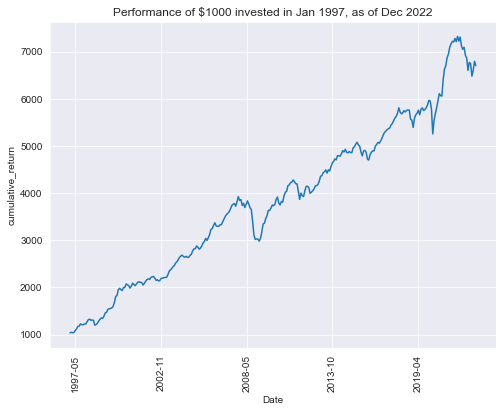

In [6]:
# Plot the line graph
plt.figure(figsize=(8, 6))
plt.title("Performance of $1000 invested in Jan 1997, as of Dec 2022")
sns.lineplot(data = return_df, x = 'Date', y = 'cumulative_return')
x_labels = ["1997-05", "2002-11", "2008-05", "2013-10", "2019-04"]
x_locations = [4, 70, 136, 201, 267]
plt.xticks(x_locations, x_labels, rotation=90)
plt.show()